# Testing AoE2.net API

more information about the api is in the link below

https://aoe2.net/#api

In [25]:
import requests
import json
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
r = requests.get('https://aoe2.net/api/strings?game=aoe2de&language=en')
print(r)
r.text

<Response [200]>


'{"language":"en","age":[{"id":0,"string":"Standard"},{"id":2,"string":"Dark Age"},{"id":3,"string":"Feudal Age"},{"id":4,"string":"Castle Age"},{"id":5,"string":"Imperial Age"},{"id":6,"string":"Post-Imperial Age"}],"civ":[{"id":0,"string":"Aztecs"},{"id":1,"string":"Berbers"},{"id":2,"string":"Britons"},{"id":3,"string":"Bulgarians"},{"id":4,"string":"Burmese"},{"id":5,"string":"Byzantines"},{"id":6,"string":"Celts"},{"id":7,"string":"Chinese"},{"id":8,"string":"Cumans"},{"id":9,"string":"Ethiopians"},{"id":10,"string":"Franks"},{"id":11,"string":"Goths"},{"id":12,"string":"Huns"},{"id":13,"string":"Incas"},{"id":14,"string":"Indians"},{"id":15,"string":"Italians"},{"id":16,"string":"Japanese"},{"id":17,"string":"Khmer"},{"id":18,"string":"Koreans"},{"id":19,"string":"Lithuanians"},{"id":20,"string":"Magyars"},{"id":21,"string":"Malay"},{"id":22,"string":"Malians"},{"id":23,"string":"Mayans"},{"id":24,"string":"Mongols"},{"id":25,"string":"Persians"},{"id":26,"string":"Portuguese"},{

In [6]:
r = requests.get('https://aoe2.net/api/leaderboard?game=aoe2de&leaderboard_id=3&start=1&count=1')
print(r)
r.text

<Response [200]>


'{"total":35921,"leaderboard_id":3,"start":1,"count":1,"leaderboard":[{"profile_id":251265,"rank":1,"rating":2369,"steam_id":"76561197996386232","icon":null,"name":"[aM] MbL40C","clan":null,"country":"NO","previous_rating":2362,"highest_rating":2369,"streak":12,"lowest_streak":-9,"highest_streak":17,"games":1486,"wins":1035,"losses":451,"drops":80,"last_match":1593055971,"last_match_time":1593055971}]}'

In [7]:
r = requests.get('https://aoe2.net/api/stats/players?game=aoe2de')
print(r)
r.text    

<Response [200]>


'{"app_id":813780,"player_stats":[{"time":1590983100,"num_players":{"steam":13687,"multiplayer":6806,"looking":1633,"in_game":5173,"multiplayer_1h":11146,"multiplayer_24h":80813}},{"time":1590983400,"num_players":{"steam":13489,"multiplayer":6679,"looking":1594,"in_game":5085,"multiplayer_1h":11080,"multiplayer_24h":80738}},{"time":1590983700,"num_players":{"steam":13313,"multiplayer":6509,"looking":1556,"in_game":4953,"multiplayer_1h":10912,"multiplayer_24h":80657}},{"time":1590984000,"num_players":{"steam":13112,"multiplayer":6450,"looking":1528,"in_game":4922,"multiplayer_1h":10761,"multiplayer_24h":80592}},{"time":1590984300,"num_players":{"steam":12958,"multiplayer":6356,"looking":1566,"in_game":4790,"multiplayer_1h":10587,"multiplayer_24h":80485}},{"time":1590984600,"num_players":{"steam":12822,"multiplayer":6208,"looking":1456,"in_game":4752,"multiplayer_1h":10420,"multiplayer_24h":80413}},{"time":1590984900,"num_players":{"steam":12625,"multiplayer":6086,"looking":1434,"in_game

In [23]:
data = []
res = json.loads(r.text)
for row in res['player_stats']:
    time = datetime.fromtimestamp(row['time']).isoformat()
    try:
        steam_players = row['num_players']['steam']
    except:
        steam_players = np.nan
    try:
        multiplayer_players = row['num_players']['multiplayer']
    except:
        multiplayer_players = np.nan
    try:
        looking_players = row['num_players']['looking']
    except:
        looking_players = np.nan
    try:
        in_game_players = row['num_players']['in_game']
    except:
        in_game_players = np.nan
    try:
        multiplayer_1h = row['num_players']['multiplayer_1h']
    except:
        multiplayer_1h = np.nan
    try:
        multiplayer_24h = row['num_players']['multiplayer_24h']
    except:
        multiplayer_24h = np.nan
    data.append({"time" : time, 
                 "steam_players" : steam_players, 
                 "multiplayer_players" : multiplayer_players,
                 "looking_players" : looking_players,
                 "in_game_players" : in_game_players,
                 "multiplayer_1h" : multiplayer_1h,
                 "multiplayer_24h" : multiplayer_24h
                })
df = pd.DataFrame(data)
df

,time,steam_players,multiplayer_players,looking_players,in_game_players,multiplayer_1h,multiplayer_24h
0,2020-05-31T22:45:00,13687.0,6806.0,1633.0,5173.0,11146.0,80813.0
1,2020-05-31T22:50:00,13489.0,6679.0,1594.0,5085.0,11080.0,80738.0
2,2020-05-31T22:55:00,13313.0,6509.0,1556.0,4953.0,10912.0,80657.0
3,2020-05-31T23:00:00,13112.0,6450.0,1528.0,4922.0,10761.0,80592.0
4,2020-05-31T23:05:00,12958.0,6356.0,1566.0,4790.0,10587.0,80485.0
...,...,...,...,...,...,...,...
8635,2020-06-30T22:20:00,14443.0,7697.0,2387.0,5310.0,11589.0,58115.0
8636,2020-06-30T22:25:00,14417.0,7730.0,2447.0,5283.0,11553.0,58116.0
8637,2020-06-30T22:30:00,14295.0,7701.0,2412.0,5289.0,11517.0,58047.0
8638,2020-06-30T22:35:00,14191.0,7711.0,2369.0,5342.0,11523.0,58039.0


In [24]:
df.to_csv('Player_Stats_History.csv',index=False)

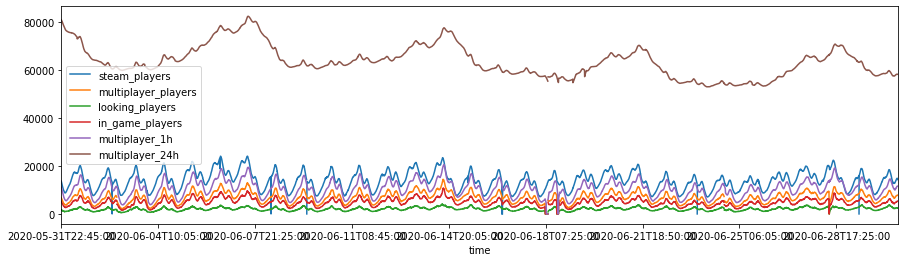

In [28]:
df.set_index('time').plot(figsize=(15,4))

## Day of the Week Analytics

In [35]:
df.time = pd.to_datetime(df.time)
df['day_of_week'] = df.time.dt.day_name()

,steam_players,multiplayer_players,looking_players,in_game_players,multiplayer_1h,multiplayer_24h
day_of_week,,,,,,
Friday,14041.476108,6639.910590,1909.952257,4729.958333,10063.272569,61100.703125
Monday,13068.674564,6860.920139,2078.231944,4782.688194,10257.885417,66597.756944
Saturday,16495.953125,8270.427083,2399.629340,5870.797743,12190.878472,67829.155382
Sunday,16562.353899,8590.958869,2497.113967,6093.844901,12985.076264,71599.143102
Thursday,12812.993001,5689.692174,1644.772174,4044.920000,8979.561739,59453.549565
Tuesday,12534.904661,6205.463483,1929.204354,4276.259129,9399.756320,59496.129213
Wednesday,12567.956484,5868.919201,1773.581234,4095.337967,9096.489140,58958.164205


In [ ]:
df.groupby('day_of_week').mean().sort_values